In [5]:
import xarray
import matplotlib.pyplot as plt

In [83]:
import numpy

In [2]:
era = xarray.open_dataset('era5_prec_train.nc')

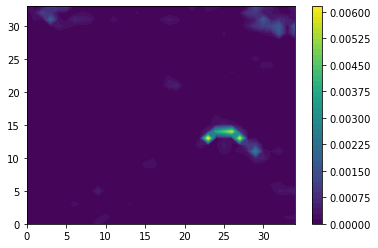

In [17]:
plt.contourf(era['tp'].isel(time=26), 40)
plt.colorbar()

In [20]:
era['tp']

<xarray.DataArray 'tp' (time: 106488, latitude: 34, longitude: 35)>
array([[[0.000000e+00, 0.000000e+00, ..., 4.887581e-06, 1.465902e-05],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [9.471085e-04, 1.925491e-04, ..., 2.111197e-04, 0.000000e+00],
        [1.984127e-04, 4.574284e-04, ..., 2.111197e-04, 4.496090e-04]],

       [[0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 2.931803e-06],
        [0.000000e+00, 0.000000e+00, ..., 0.000000e+00, 0.000000e+00],
        ...,
        [1.348816e-04, 9.891372e-04, ..., 3.899857e-04, 0.000000e+00],
        [3.166795e-04, 1.661479e-05, ..., 2.150275e-04, 1.857057e-04]],

       ...,

       [[0.000000e+00, 0.000000e+00, ..., 5.961955e-05, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 1.045801e-04, 6.059930e-05],
        ...,
        [7.985421e-04, 1.289202e-03, ..., 2.189390e-04, 8.894503e-05],
        [2.355538e-04, 1.485646e-04, ..., 0.000000e+00, 8.795410e-06]],

       [[0.000000e+00, 0.000000e+00, ..., 4.202873e-05, 0.000000e+00],
        [0.000000e+00, 0.000000e+00, ..., 1.094677e-04, 7.330626e-05],
        ...,
        [1.265744e-03, 1.954818e-03, ..., 1.788661e-04, 3.225431e-04],
        [1.798421e-04, 1.309738e-04, ..., 0.000000e+00, 7.819384e-06]]],
      dtype=float32)
Coordinates:
  * longitude  (longitude) float32 66.0 67.0 68.0 69.0 ... 97.0 98.0 99.0 100.0
  * latitude   (latitude) float32 39.0 38.0 37.0 36.0 35.0 ... 9.0 8.0 7.0 6.0
  * time       (time) datetime64[ns] 1950-05-01 ... 1978-09-30T23:00:00
Attributes:
    units:      m
    long_name:  Total precipitation

In [34]:
summed = era['tp'].resample(time='D').sum().rename({'latitude': 'lat', 'longitude': 'lon'})

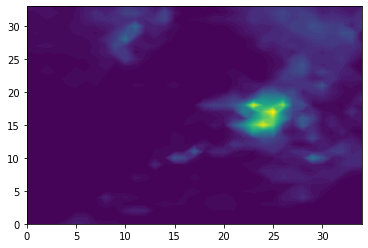

In [35]:
plt.contourf(summed.isel(time=40), 60)

In [37]:
summed2 = summed.reindex(lat=summed.lat[::-1])

In [46]:
clim = summed2.loc[(summed2.time.dt.month <= 9) & (summed2.time.dt.month >= 5)]

In [49]:
clim_grouped = clim.assign_coords(dayofyear=clim.time.dt.strftime("%m-%d")).groupby('dayofyear')

In [50]:
clim_mean = clim_grouped.mean()

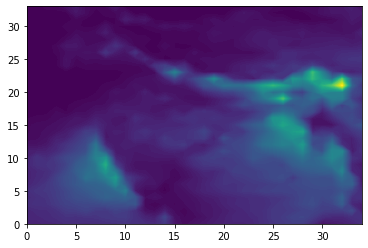

In [59]:
plt.contourf(clim_mean.isel(dayofyear=50), 100)

In [64]:
(clim_grouped - clim_mean).to_netcdf('era5_anomalies.nc')

In [61]:
mask_lowres = xarray.open_dataset('mask_lowres.h5')

In [65]:
anomalies = clim_grouped - clim_mean

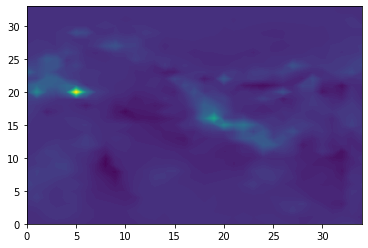

In [73]:
plt.contourf(anomalies.isel(time=90), 100)

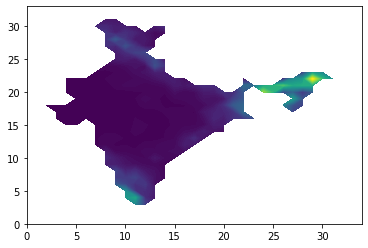

In [89]:
c = clim_mean.isel(dayofyear=10).values
#c[~mask_lowres['mask']] = numpy.nan
plt.contourf(c, 100)

In [74]:
clim_mean.to_netcdf('clim_mean_era5.nc')

In [110]:
x = anomalies.stack(stacked=['lat', 'lon']).values

In [119]:
sum(x.reshape(29, 153, 1190)[0, :, :] - test)

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [116]:
test = anomalies.stack(stacked=['lat', 'lon']).sel(time=anomalies.time.dt.year==1950).values